<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/youtube-top-100-songs-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('youtube-top-100-songs-2025.csv')
df.shape

(100, 13)

In [4]:
df

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ariana Grande - twilight zone (Official Lyric ...,Ariana Grande - twilight zone (Official Lyric ...,The official “twilight zone” official lyric vi...,18245315,Music,Ariana Grande;Republic Records;Pop,202,3:22,False,https://i.ytimg.com/vi/x1XIJM6spaE/maxresdefau...,Ariana Grande,https://www.youtube.com/channel/UC0VOyT2OCBKdQ...,56400000
96,"Gracie Abrams - I Love You, I’m Sorry (Officia...","Gracie Abrams - I Love You, I’m Sorry (Officia...","Listen to the new album, The Secret of Us, out...",31456772,Music,"Gracie Abrams;Gracie Abrams, under exclusive l...",234,3:54,False,https://i.ytimg.com/vi/uxjhN_Donfw/maxresdefau...,Gracie Abrams,https://www.youtube.com/channel/UCVFRVXH1hRoWk...,1770000
97,HoodTrophy Bino ft. FCG Heem - Miami (Official...,HoodTrophy Bino ft. FCG Heem - Miami (Official...,HoodTrophy Bino and FCG Heem drop Miami. From...,66051,Music,NaN,197,3:17,False,https://i.ytimg.com/vi_webp/I-gmbHgeN1I/maxres...,HoodTrophy Bino,https://www.youtube.com/channel/UCsaZi3QZrZ5-s...,20300
98,Sean Paul x INNA - Let It Talk To Me,Sean Paul x INNA - Let It Talk To Me,Song Title: Sean Paul x INNA - Let It Talk To ...,16952860,Music,Sean Paul,155,2:35,False,https://i.ytimg.com/vi_webp/nkRyAVQdqAA/maxres...,Sean Paul,https://www.youtube.com/channel/UCkdc7gHpavxpg...,5200000


In [5]:

df.dtypes

,0
title,object
fulltitle,object
description,object
view_count,int64
categories,object
tags,object
duration,int64
duration_string,object
live_status,bool
thumbnail,object


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
view_count,100.0,1.059103e+08,2.491132e+08,1161.0,18527021.0,37982240.0,1.111073e+08,2.009015e+09
duration,100.0,2.039000e+02,4.426059e+01,120.0,173.0,193.5,2.317500e+02,3.540000e+02
channel_follower_count,100.0,1.612067e+07,1.980038e+07,1.0,613250.0,6320000.0,2.760000e+07,7.620000e+07


In [7]:
df['title'].value_counts()

,count
title,
ROSÉ & Bruno Mars - APT. (Official Music Video),1
"Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)",1
Reneé Rapp - Leave Me Alone (Official Music Video),1
Billie Eilish - BIRDS OF A FEATHER (Official Music Video),1
Reneé Rapp - Mad (Official Music Video),1
...,...
Ariana Grande - twilight zone (Official Lyric Video),1
"Gracie Abrams - I Love You, I’m Sorry (Official Music Video)",1
HoodTrophy Bino ft. FCG Heem - Miami (Official Music Video),1


In [8]:
df['channel'].value_counts()

,count
channel,
Sabrina Carpenter,7
Tate McRae,4
ROSÉ,3
Billie Eilish,3
Lady Gaga,3
...,...
Addison Rae,1
keshi,1
Maz Univerze,1


In [12]:
df['channel_follower_count'].value_counts()

,count
channel_follower_count,
12300000,7
6320000,4
19200000,3
56800000,3
29600000,3
...,...
4350000,1
1900000,1
2120,1


In [11]:
df['duration'].value_counts()

,count
duration,
252,3
161,3
166,3
191,3
187,3
...,...
223,1
157,1
195,1


In [13]:
df['view_count'].value_counts()

,count
view_count,
2009014557,1
1324833300,1
2536628,1
558329099,1
2113548,1
...,...
18245315,1
31456772,1
66051,1


In [14]:
df.dropna(inplace=True)
df.shape

(85, 13)

In [15]:
df.isna().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,0
duration,0
duration_string,0
live_status,0
thumbnail,0


In [17]:
df.reset_index(inplace=True,drop=True)

In [18]:
df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [19]:
df.to_csv('youtube-top-100-songs-2025.csv', index = None, header=True)

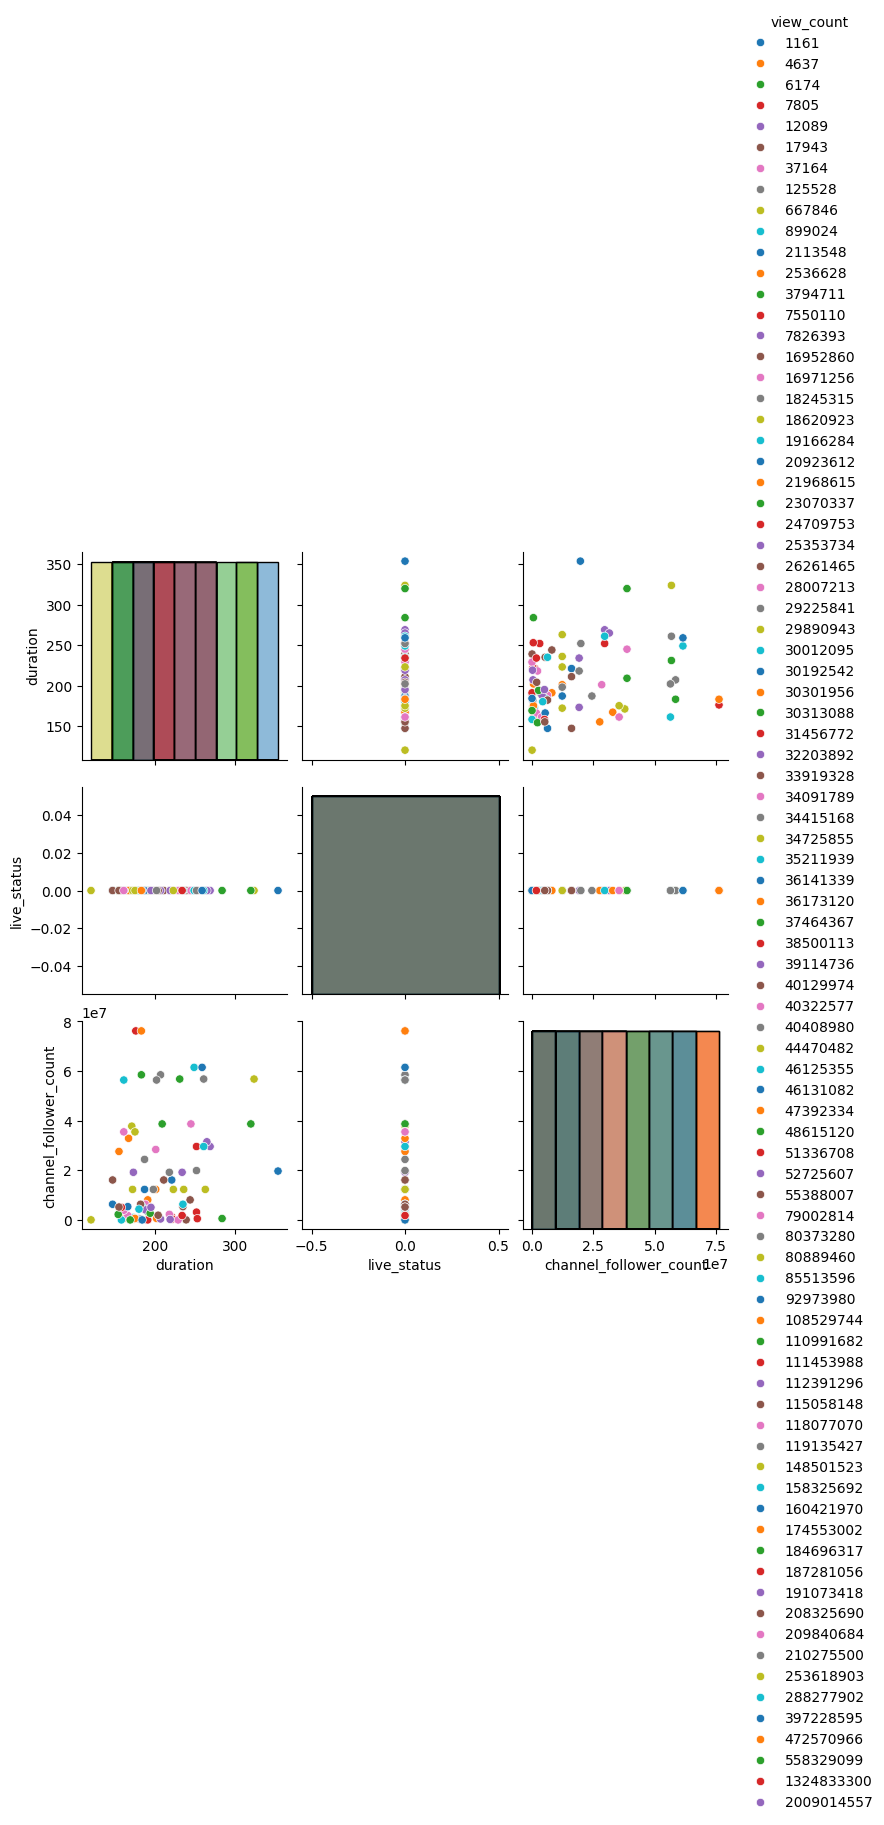

In [20]:
sns.pairplot(data=df, hue='view_count', diag_kind='hist', palette='tab10')

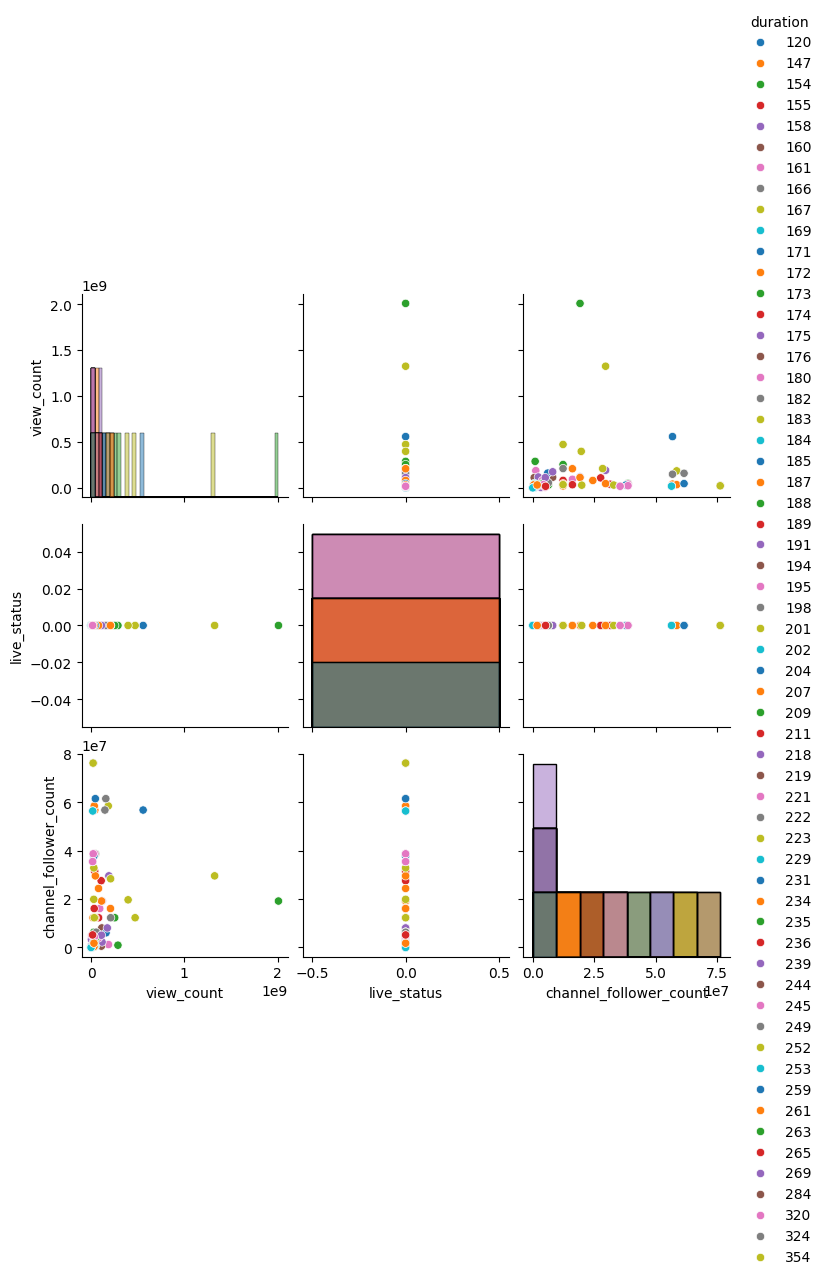

In [21]:
sns.pairplot(data=df, hue='duration', diag_kind='hist', palette='tab10')

<Axes: xlabel='view_count', ylabel='duration'>

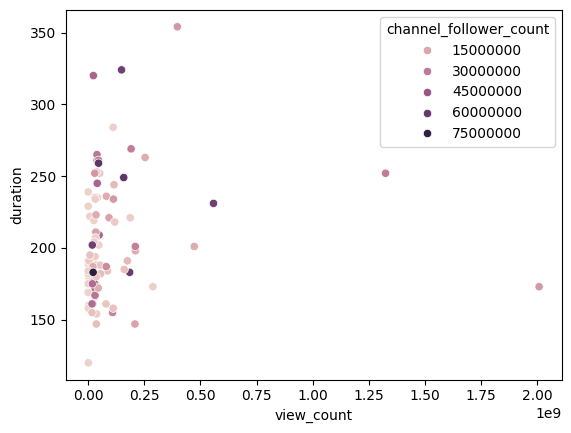

In [27]:
sns.scatterplot(x='view_count', y='duration',data=df, hue='channel_follower_count')

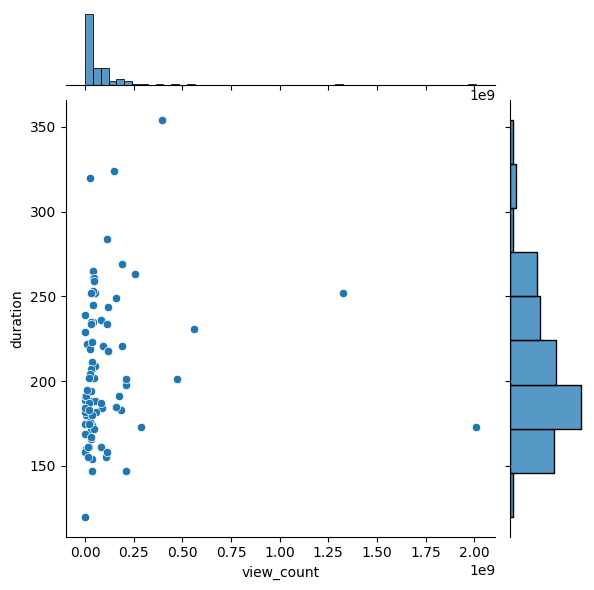

In [28]:
sns.jointplot(x='view_count', y='duration',data=df, kind='scatter')

<Axes: >

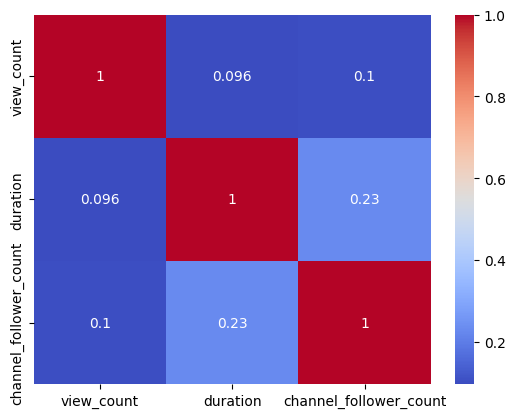

In [22]:
numdf=df.select_dtypes(include=['float64','int64'])
sns.heatmap(numdf.corr(method="pearson"), cmap="coolwarm", annot=True)